In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from  data_tools.curve_fitting import shear_func_inf_obj, WLF_obj
from sklearn.metrics import mean_squared_error as mse
import joblib
from data_tools.curve_fitting import *

In [2]:
date = '2022-09-14'
data_type = 'full_aug_mod'
version = ''
path = f'../../../data/ayush/Melt_Viscosity_Predictor/Extrapolation_Tests/{date}_{data_type}{version}/'

In [3]:
alt_path = f'../../../data/ayush/Melt_Viscosity_Predictor/Extrapolation_Tests/2022-09-09_{data_type}{version}/'
shear_predicted_constants_gpr = pd.read_pickle(path + 'gpr_shear_const.pickle')
shear_predicted_constants_ann = pd.read_pickle(path + 'ANN_shear_const.pickle')
shear_predicted_constants_HypNet = pd.read_pickle(path + 'HypNet_shear_const.pickle')
shear_data = pd.read_pickle('./Data/shear_const_data.pickle')


# Mw plots

In [4]:

predicted_constants_gpr = pd.read_pickle(path + 'gpr_Mw_const.pickle')
predicted_constants_ann = pd.read_pickle(path + 'ANN_Mw_const.pickle')
predicted_constants_HypNet = pd.read_pickle(path + 'HypNet_Mw_const.pickle')
Mw_data = pd.read_pickle('./Data/Mw_const_data.pickle')

In [5]:
wlf_constants_gpr = pd.read_pickle(path + 'gpr_WLF_const.pickle')
wlf_constants_ann = pd.read_pickle(path + 'ANN_WLF_const.pickle')
wlf_constants_HypNet = pd.read_pickle(path + 'HypNet_WLF_const.pickle')
temp_data = pd.read_pickle('Data/temp_const_data.pickle')

In [6]:
wlf_constants_HypNet = wlf_constants_HypNet[wlf_constants_HypNet['r'] ==20]
#print(wlf_constants_HypNet.loc[wlf_constants_HypNet['r'] == 10, 'r2_fit'].mean())
#print(wlf_constants_HypNet.loc[wlf_constants_HypNet['r'] == 5, 'r2_fit'].mean())

# COMBINED CHART

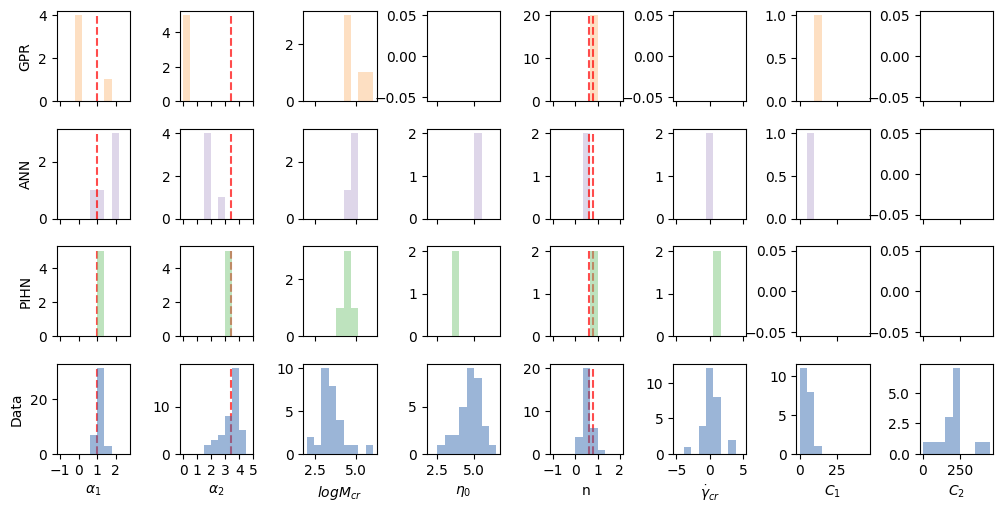

In [7]:
fig, ax = plt.subplots(4,8, figsize = (10,5), sharex='col')
ax_font = 10
bins = np.linspace(-5, 12, 15)
bins = 10
fig.tight_layout(pad = 1)


colors = {'GPR':plt.get_cmap('Accent')(0.3), 'ANN': plt.get_cmap('Accent')(0.2), 'PIHN': plt.get_cmap('Accent')(0.1), 'Data': plt.get_cmap('Accent')(0.5)}
#titles
ax[0,0].set_ylabel('GPR')#, rotation = 0)
ax[1,0].set_ylabel('ANN')#, rotation = 0)
ax[2,0].set_ylabel('PIHN')#, rotation = 0)
ax[3,0].set_ylabel('Data')#, rotation = 0)

Ys = [r'$\alpha_1$', r'$\alpha_2$', r'$logM_{cr}$', r'$\eta_0$', 'n',r'$\dot{\gamma}_{cr}$', r'$C_1$', r'$C_2$']
for i in range(len(Ys)):
    #for n in range(4):
    ax[3, i].set(xlabel = Ys[i])
        
#MW
bins_a1 = np.arange(-1, 3, 4/bins)
ys = []
y,_,_ =ax[0,0].hist(predicted_constants_gpr['a1'], bins = bins_a1, alpha = 0.5 ,label = 'GPR', zorder = 1, color = colors['GPR'])
ys.append(y)
y,_,_ = ax[1,0].hist(predicted_constants_ann['a1'], bins = bins_a1, alpha = 0.5 ,label = 'ANN', zorder = 2, color = colors['ANN'])
ys.append(y)
y,_,_ =ax[2,0].hist(predicted_constants_HypNet['a1'], bins = bins_a1, alpha = 0.5 ,label = 'HyperNetwork', zorder = 3, color = colors['PIHN'])
ys.append(y)
y,_,_ =ax[3,0].hist(Mw_data['a1'], bins = bins_a1, alpha = 0.5 ,label = 'Data', zorder = 4, color = colors['Data'])
ys.append(y)
# ax[1,0].plot([1, 1], [0, 160], '--', color = 'r')
# ax[1,0].tick_params(axis='both', which='major', labelsize=ax_font)
# ax[1,0].set_xticks([-4, -2,0, 2 ,4], fontsize = ax_font)
for i in [0,1,2,3]:
    ax[i,0].plot([1, 1], [0, ys[i].max()], '--', color = 'r', alpha = 0.7)
    #ax[0,i].set_xlim([-1, 4])
    ax[i,0].set_xticks([-1, 0, 1, 2])


bins_a2 = np.arange(0, 5, 5/bins)
ys =[]
y,_,_ =ax[0,1].hist(predicted_constants_gpr['a2'], bins = bins_a2, alpha = 0.5 ,label = 'GPR', zorder =1, color = colors['GPR'])
ys.append(y)
y,_,_ =ax[1,1].hist(predicted_constants_ann['a2'], bins = bins_a2, alpha = 0.5 ,label = 'ANN', zorder =2, color = colors['ANN'])
ys.append(y)
y,_,_ =ax[2,1].hist(predicted_constants_HypNet['a2'], bins = bins_a2, alpha = 0.5 ,label = 'HyperNetwork', zorder = 3, color = colors['PIHN'])
ys.append(y)
y,_,_ =ax[3,1].hist(Mw_data['a2'], bins = bins_a2, alpha = 0.5 ,label = 'Data', zorder = 4, color = colors['Data'])
ys.append(y)


for i in [0,1,2,3]:
    ax[i,1].plot([3.4, 3.4], [0, ys[i].max()], '--', color = 'r', alpha = 0.7)
    ax[i,1].set_xticks([0, 1, 2, 3,4 ,5])


bins_mcr = np.arange(2, 6.5, 4.5/bins)
ax[1,2].hist(predicted_constants_ann['Mcr'], bins = bins_mcr, alpha = 0.5 ,label = 'ANN', zorder = 2, color = colors['ANN'])
ax[0,2].hist(predicted_constants_gpr['Mcr'], bins = bins_mcr, alpha = 0.5 ,label = 'GPR', zorder = 1, color = colors['GPR'])
ax[2,2].hist(predicted_constants_HypNet['Mcr'].dropna(), bins = bins_mcr, alpha = 0.5 ,label = 'Hypernetwork', zorder = 3, color = colors['PIHN'])
ax[3,2].hist(Mw_data['Mcr'].dropna(), bins = bins_mcr, alpha = 0.5 ,label = 'Data', zorder = 4, color = colors['Data'])
#ax[1,1].legend(fontsize = ax_font - 6)
# ax[1,1].set_xlabel(r'$M_{cr}$', fontsize = ax_font)
# ax[1,1].tick_params(axis='both', which='major', labelsize=ax_font)
# ax[1,1].legend(fontsize = 16, loc = 'lower right', bbox_to_anchor=(1, -.75), ncol = 4)

#SHEAR

bins_zs = np.arange(2, 7, 5/bins)
#ax[0,1].hist([a[0] for a in predicted_constants_ann2['a2']], bins = bins, alpha = 0.5 ,label = 'ANN1')
ax[0,3].hist(np.log10(np.array(shear_predicted_constants_gpr['z_shear']).tolist()), bins = bins_zs, alpha = 0.5 ,label = 'GPR',zorder = 1, color = colors['GPR'])
ax[1,3].hist(np.log10(np.array(shear_predicted_constants_ann['z_shear']).tolist()), bins = bins_zs, alpha = 0.5 ,label = 'ANN', zorder = 2, color = colors['ANN'])
ax[2,3].hist([a.item() for a in shear_predicted_constants_HypNet['z_shear']], bins = bins_zs, alpha = 0.5 ,label = 'HypNet', zorder = 3, color = colors['PIHN'])
ax[3,3].hist(np.log10(np.array(shear_data['z_shear']).tolist()), bins = bins_zs, alpha = 0.5 ,label = 'Data', zorder = 4, color = colors['Data'])


#ax[0,1].set_xticks([-4, 0, 4, 8, 12], fontsize = ax_font)
#ax[0,1].tick_params(axis='both', which='major', labelsize=ax_font)

ys = []
bins_n = np.linspace(-1, 2, bins)
y,_,_ =ax[0,4].hist(shear_predicted_constants_gpr['n'], bins = bins_n , alpha = 0.5 ,label = 'GPR', zorder = 1, color = colors['GPR'])
ys.append(y)
y,_,_ =ax[1,4].hist(shear_predicted_constants_ann['n'], bins = bins_n , alpha = 0.5 ,label = 'ANN', zorder = 2, color = colors['ANN'])
ys.append(y)
y,_,_ =ax[2,4].hist([a for a in shear_predicted_constants_HypNet['n']], bins_n , alpha = 0.5 ,label = 'HypNet', zorder = 3, color = colors['PIHN'])
ys.append(y)
y,_,_ =ax[3,4].hist(shear_data['n'], bins =bins_n , alpha = 0.5 ,label = 'Data', zorder = 4, color = colors['Data'])
ys.append(y)

#ax[1,0].plot([1, 1], [0, 160], '--', color = 'r')
#ax[1,0].legend(title = r'n')
for i in [0,1,2,3]:
    ax[i,4].plot([0.6, 0.6], [0, ys[i].max()], '--', color = 'r', alpha = 0.7)
    ax[i,4].plot([0.8, 0.8], [0, ys[i].max()], '--', color = 'r', alpha = 0.7)
    ax[i,4].set_xticks([-1, 0, 1, 2], fontsize = ax_font)
#ax[1,0].tick_params(axis='both', which='major', labelsize=ax_font)

Scr_bins = np.linspace(-5, 5, bins)
ax[1,5].hist(np.log10((np.array(shear_predicted_constants_ann['S_cr'])).tolist()), bins = Scr_bins, alpha = 0.5 ,label = 'ANN', color = colors['ANN'])
ax[0,5].hist(np.log10((np.array(shear_predicted_constants_gpr['S_cr'])).tolist()), bins = Scr_bins, alpha = 0.5 ,label = 'GPR', color = colors['GPR'])
ax[2,5].hist([a.item() for a in shear_predicted_constants_HypNet['S_cr']], bins = Scr_bins, alpha = 0.5 ,label = 'HypNet', color = colors['PIHN'])
ax[3,5].hist(np.log10((np.array(shear_data['tau'])/np.array(shear_data['z_shear'])).tolist()), bins = Scr_bins, alpha = 0.5 ,label = 'Data', color = colors['Data'])
#ax[2,1].set_xticks([-4, -2, 0, 2, 4], fontsize = ax_font)
#ax[2,1].set_xlabel(r'$\dot{\gamma}_c$ (1/s)', fontsize = ax_font)
#ax[1,1].tick_params(axis='both', which='major', labelsize=ax_font-2)

#ax[1,1].legend(title = r'$\dot{\gamma}_c$')


#TEMP
bins_c1 = np.arange(0, 50, 50/bins)
ax[1,6].hist(wlf_constants_ann['C1'][abs(wlf_constants_ann['C1']) < 1000], bins = bins_c1, alpha = 0.5 ,label = 'ANN', color = colors['ANN'])#, color = colors['ANN'])
#ax[0,1].hist([a[0] for a in predicted_constants_ann2['a2']], bins = bins, alpha = 0.5 ,label = 'ANN1')
ax[0,6].hist(wlf_constants_gpr['C1'][abs(wlf_constants_gpr['C1']) < 1000], bins = bins_c1, alpha = 0.5 ,label = 'GPR', color = colors['GPR'])#, color = colors['GPR'])
ax[2,6].hist([a for a in wlf_constants_HypNet['C1']], bins = bins_c1, alpha = 0.5 ,label = 'PIHN', color = colors['PIHN'])#, color = colors['PIHN'])
ax[3,6].hist(temp_data['C1'][temp_data['C1'] < 1000], bins = bins_c1, alpha = 0.5 ,label = 'Data', color = colors['Data'])#, color = colors['Data'])
#ax[0,1].plot([3.4, 3.4], [0, 90], '--', color = 'r')
#ax[1].set_xlabel(r'C1', fontsize = 16)
#ax[1].legend(title = r'C1')

bins_c2 = np.arange(0, 500, 500/bins)
ax[1,7].hist(wlf_constants_ann['C2'][abs(wlf_constants_ann['C2']) < 1000], bins = bins_c2, alpha = 0.5 ,label = 'ANN', color = colors['ANN'])#, color = colors['ANN'])
#ax[0,1].hist([a[0] for a in predicted_constants_ann2['a2']], bins = bins, alpha = 0.5 ,label = 'ANN1')
ax[0,7].hist(wlf_constants_gpr['C2'][abs(wlf_constants_gpr['C2']) < 1000], bins = bins_c2, alpha = 0.5 ,label = 'GPR', color = colors['GPR'])#, color = colors['GPR'])
ax[2,7].hist([a for a in wlf_constants_HypNet['C2']], bins = bins_c2, alpha = 0.5 ,label = 'PIHN', color = colors['PIHN'])#, color = colors['PIHN'])
ax[3,7].hist(temp_data['C2'][temp_data['C2'] < 1000], bins = bins_c2, alpha = 0.5 ,label = 'Data', color = colors['Data'])#, color = colors['Data'])
#ax[0,1].plot([3.4, 3.4], [0, 90], '--', color = 'r')
#ax[2].set_xlabel(r'C2 (K)', fontsize = 16)
#ax[2].legend(fontsize = 14, loc = 'lower right', bbox_to_anchor=(1, -1), ncol = 4)





plt.savefig('../../../data/ayush/Melt_Viscosity_Predictor/Paper_Fig/physics_analysis.svg', dpi = 300)




In [8]:
print('Statistics')

print('Mw a1 RMSE')
print('GPR', mse(np.ones_like(predicted_constants_gpr['a1']), predicted_constants_gpr['a1'], squared=False))
print('ANN', mse(np.ones_like(predicted_constants_ann['a1']), predicted_constants_ann['a1'], squared=False))
print('PIHN', mse(np.ones_like(predicted_constants_HypNet['a1']), predicted_constants_HypNet['a1'], squared=False))

print('Mw a2 RMSE')
print('GPR', mse(np.ones_like(predicted_constants_gpr['a2'])*3.4, predicted_constants_gpr['a2'], squared=False))
print('ANN', mse(np.ones_like(predicted_constants_ann['a2'])*3.4, predicted_constants_ann['a2'], squared=False))
print('PIHN', mse(np.ones_like(predicted_constants_HypNet['a2'])*3.4, predicted_constants_HypNet['a2'], squared=False))

Statistics
Mw a1 RMSE
GPR 1.4452627650691057
ANN 0.49090475170934894
PIHN 0.10071282
Mw a2 RMSE
GPR 2.423643205421648
ANN 1.3120892730666707
PIHN 0.15074183


In [15]:
corr = pd.DataFrame(columns = ['gpr', 'ann', 'HypNet'], index = ['Mw', 'T', 'Shear'])
for i in corr.columns:
    corr.loc['Shear', i] = f"{locals()['shear_predicted_constants_' + i].loc[locals()['shear_predicted_constants_' + i]['r2']>-5, 'r2'].mean()} +/- {locals()['shear_predicted_constants_' + i]['r2'].std()}"
    corr.loc['Mw', i] = f"{locals()['predicted_constants_' + i].loc[locals()['predicted_constants_' + i]['r2']>-5, 'r2'].mean()} +/- {locals()['predicted_constants_' + i]['r2'].std()}"
    corr.loc['T', i] = f"{locals()['wlf_constants_' + i].loc[locals()['wlf_constants_' + i]['r2']>-5, 'r2'].mean()} +/- {locals()['wlf_constants_' + i]['r2'].std()}"
    if i == 'HypNet':
        corr.loc['T', i] = f"{locals()['wlf_constants_' + i].loc[locals()['wlf_constants_' + i]['r2_fit']>-5, 'r2_fit'].mean()} +/- {locals()['wlf_constants_' + i]['r2_fit'].std()}"



In [16]:
corr.rename(columns={'HypNet': 'PIHN'})

,gpr,ann,PIHN
Mw,0.8194693402786585 +/- 0.23246761691972112,0.9972232145114833 +/- 0.0016973948638648881,0.9919294377547594 +/- 0.002694770596270771
T,0.6701358011931466 +/- 0.5786888357111455,0.348515407925762 +/- 0.2760968954372795,0.7058650941368887 +/- 0.2507683995522225
Shear,0.8001837282547488 +/- 0.25296240472766074,0.6683540903181339 +/- 0.2962274953674112,0.9936527125081421 +/- 0.0038788258474310154


In [12]:
shear_predicted_constants_HypNet.loc[shear_predicted_constants_HypNet['r2'] < 0.9,:]

,Sample,z_shear,n,S_cr,r2


In [27]:
T_scaler = joblib.load('MODELS/2022-09-14_full_aug_mod/scalers/T_scaler.save')
y_scaler = joblib.load('MODELS/2022-09-14_full_aug_mod/scalers/y_scaler.save')

In [28]:
T_scaler.data_min_, T_scaler.data_max_

(array([-30.]), array([350.]))

Tr_unsc [[0.3161835]] Tr_y 0.31700033 C1_unsc [[0.42814532]] C2_unsc [[0.7068512]]
(40,) [0.76437494 0.75079747 0.73729726 0.72387365 0.71052598 0.69725362
 0.68405593 0.67093229 0.65788206 0.64490464 0.63199942 0.61916579
 0.60640317 0.59371097 0.5810886  0.56853549 0.55605107 0.54363478
 0.53128607 0.51900437 0.50678916 0.49463989 0.48255602 0.47053704
 0.45858241 0.44669163 0.43486418 0.42309957 0.41139728 0.39975683
 0.38817773 0.37665949 0.36520164 0.3538037  0.3424652  0.33118568
 0.31996468 0.30880175 0.29769643 0.28664828]
(40,) [0.7217798  0.55546933 0.67958575 0.6866171  0.6033352  0.59917724
 0.60327864 0.4903268  0.5524353  0.5507303  0.51215464 0.49079338
 0.5499509  0.4181918  0.4439935  0.55899936 0.54       0.48244736
 0.46517134 0.3832618  0.39736164 0.41962934 0.45354503 0.38093194
 0.26567236 0.41360015 0.41405967 0.35820296 0.4107208  0.3201777
 0.23933683 0.22808121 0.29969743 0.15248203 0.24279991 0.3663328
 0.23716147 0.15806256 0.15952732 0.21153902]
Tr [[90.149734]] Tr_y [[2.3562357]] C1 [[4.004844]] C1_adj [[6.35065981]] C2 [[268.60345459]]
Tr_fit 200.00000000004334 Tr_y_fit 6.328579763306446 C1_fit 12.379879032738007 C2_fit 299.99994217388235
r2 0.4834598165234547 0.8561099943788573

In [29]:
test_pred = [0.7217798 , 0.55546933, 0.67958575, 0.6866171,  0.6033352 , 0.59917724,
 0.60327864, 0.4903268 , 0.5524353 , 0.5507303 , 0.51215464, 0.49079338,
 0.5499509 , 0.4181918 , 0.4439935,  0.55899936, 0.54      , 0.48244736,
 0.46517134 ,0.3832618 , 0.39736164 ,0.41962934, 0.45354503, 0.38093194]
print(len(test_pred))
temps = np.arange(195,201, .25)


24


(array([ 83., 488., 255., 210., 142.,  78.,  15.,  56.,   4.,   1.]),
 array([223.83331, 234.51471, 245.1961 , 255.87752, 266.5589 , 277.2403 ,
        287.92172, 298.60312, 309.28452, 319.9659 , 330.6473 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

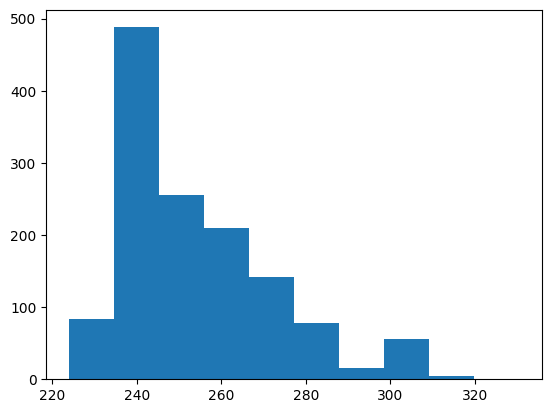

In [13]:
plt.hist([a[0][0] for a in wlf_constants_HypNet['C2']], bins = 10)

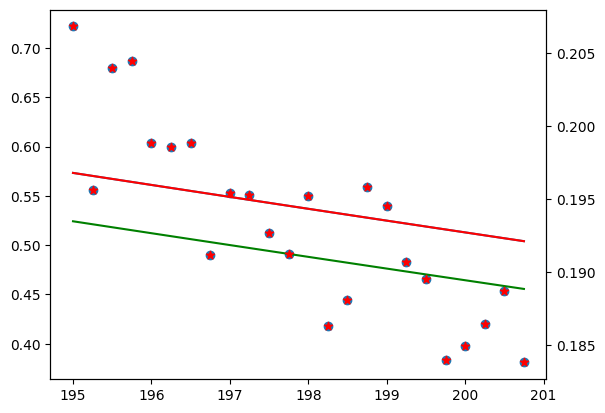

In [65]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.scatter(temps,test_pred)
ax2.scatter(temps,y_scaler.transform(np.array(test_pred).reshape(-1,1)), marker = '*', color = 'r')
ax1.plot(temps, WLF_obj(temps,90.14, 6.0, 238.60, 2.356), color = 'g')
ax2.plot(temps, WLF_obj(T_scaler.transform(temps.reshape(-1,1)),0.3161835, 0.42814532, 0.7068512, 0.31700033), color ='r')
unsc_const_fit = y_scaler.inverse_transform(WLF_obj(T_scaler.transform(temps.reshape(-1,1)),0.3161835, 0.42814532, 0.7068512, 0.31700033))
ax1.plot(temps, unsc_const_fit)


In [67]:
r2_score(test_pred,unsc_const_fit)

0.30106856135505855

In [66]:
T_scaler.inverse_transform([[0.7068]])/2

array([[119.292]])

In [6]:
Tr_unsc = 0.318
C1_unsc = 0.435
C2_unsc = 0.703

In [7]:
T_scaler.inverse_transform(np.array([Tr_unsc, C1_unsc, C2_unsc]).reshape(-1,1))

array([[ 90.84],
       [135.3 ],
       [237.14]])

In [8]:
T_p = T_scaler.transform([[100]]) - T_scaler.transform([[50]])

In [9]:
T_scaler.inverse_transform(0.70 +T_p)

array([[286.]])